In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#filling the missing values in Embarked column
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [6]:
#creating a column of family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [7]:
#extracting titles from the name columns
df['Title'] = df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [8]:
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
# map the normalized titles to the current titles 
df.Title = df.Title.map(normalized_titles)
# view value counts for the normalized titles
print(df.Title.value_counts())


Title
Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: count, dtype: int64


In [9]:
# group by Sex, Pclass, and Title 
grouped = df.groupby(['Sex','Pclass', 'Title'])  
# view the median Age by the grouped features 
grouped.Age.median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    40.5
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64

In [10]:
#filling the missing values in age column
df['Age'] = df.groupby(['Sex', 'Pclass', 'Title'])['Age'].transform(lambda x: x.fillna(x.median()))


In [11]:
# filling missing values in cabin column
df.Cabin = df.Cabin.fillna('U')

In [12]:


# Define the fare bins (edges)
bins = [-0.1, 100,200, 300, 400, 500, 600]

# Create labels for the fare ranges
labels = ['0-100','101-200','201-300','301-400','400-500','501-600']

# Create a new column 'FareRange' using pd.cut
df['FareRange'] = pd.cut(df['Fare'], bins=bins, labels=labels, right=True)

# Display the resulting DataFrame
print(df[['Fare', 'FareRange']].head())


      Fare FareRange
0   7.2500     0-100
1  71.2833     0-100
2   7.9250     0-100
3  53.1000     0-100
4   8.0500     0-100


In [13]:
# Create age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


In [14]:
df['Alone'] = ((df['SibSp'] == 0) & (df['Parch'] == 0)).astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    object  
 12  FamilySize   891 non-null    int64   
 13  Title        891 non-null    object  
 14  FareRange    891 non-null    category
 15  AgeGroup     891 non-null    category
 16  Alone        891 non-null    int64   
dtypes: category(2), float64(2), int64(7), object(6)
memory usage: 106.9+ KB


In [15]:
df['FareRange'].isnull().sum()

np.int64(15)

In [96]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [89]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [90]:
df['AgeGroup'].value_counts()

AgeGroup
21-30     312
31-40     186
11-20     135
41-50     117
0-10       66
51-60      49
61-70      19
71-80       6
81-90       1
91-100      0
Name: count, dtype: int64

In [22]:
df['FareRange'].value_counts()

FareRange
0-100      838
101-200     33
201-300     17
501-600      3
301-400      0
400-500      0
Name: count, dtype: int64

In [92]:
df['FamilySize'].value_counts()

FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [93]:
df['alone'].value_counts()

alone
True     537
False    354
Name: count, dtype: int64

In [94]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [95]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

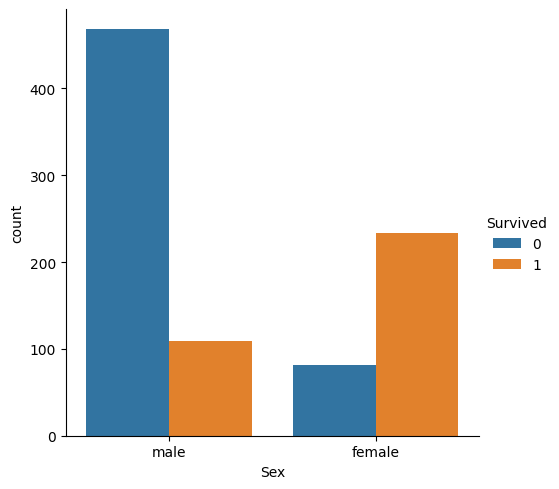

In [ ]:
# barplot to show the count of people survived across gender
sns.catplot(x ="Sex", hue ="Survived",  
kind ="count", data = df) 

<Axes: xlabel='Sex', ylabel='Pclass'>

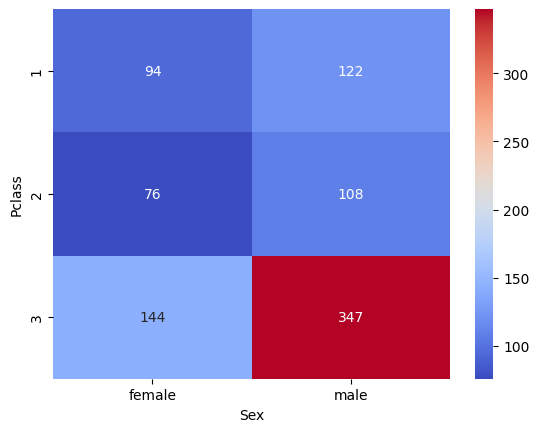

In [49]:
group = df.groupby(['Pclass', 'Sex']) 
pclass_survived = group.size().unstack() 
  
# Heatmap - Color encoded 2D representation of data. 
sns.heatmap(pclass_survived, annot = True, fmt ="g",cmap='coolwarm') 

<Axes: xlabel='Sex', ylabel='Age'>

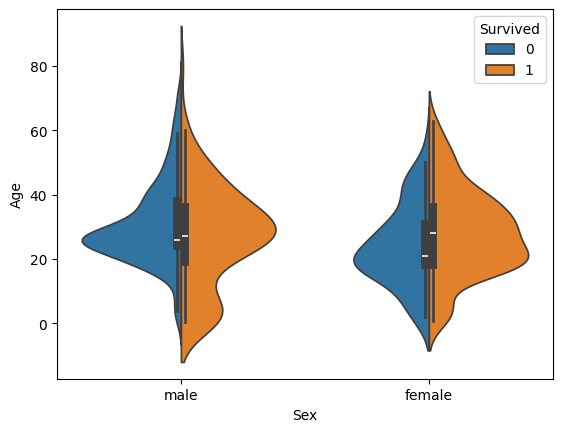

In [50]:
#finding the number of people who survived among gender and age
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",  
data = df, split = True) 

C:\Users\Dharshinee R\AppData\Local\Temp\ipykernel_6628\550197396.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_by_age_sex = df.groupby(['AgeGroup', 'Sex'])['Fare'].mean().unstack()


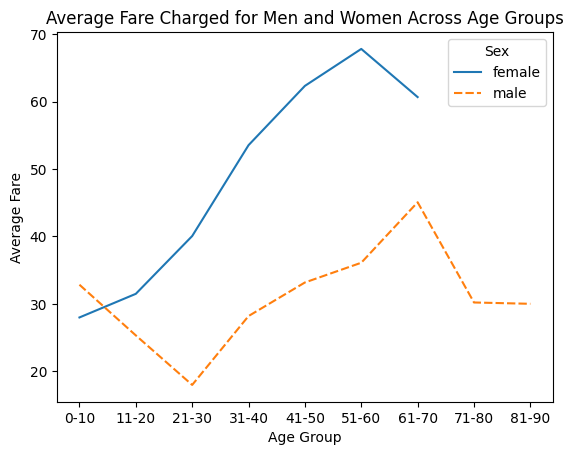

In [59]:
fare_by_age_sex = df.groupby(['AgeGroup', 'Sex'])['Fare'].mean().unstack()
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a line plot to show the average fare across age groups for each sex
sns.lineplot(data=fare_by_age_sex)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Average Fare')
plt.title('Average Fare Charged for Men and Women Across Age Groups')

# Show the plot
plt.show()


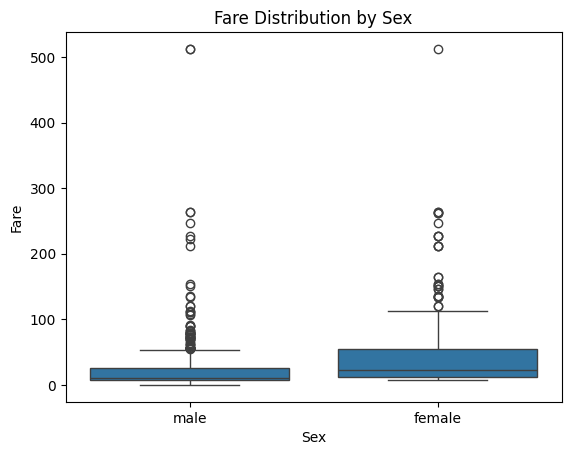

In [60]:
# Create a boxplot to show the distribution of fares by sex
sns.boxplot(x='Sex', y='Fare', data=df)

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Fare')
plt.title('Fare Distribution by Sex')

# Show the plot
plt.show()

In [61]:
fare_by_sex = df.groupby('Sex')['Fare'].mean()
fare_by_sex

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

<Axes: title={'center': 'Proportion of people travelled alone'}, ylabel='alone'>

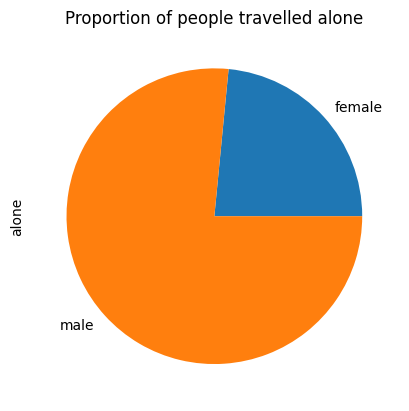

In [67]:
alone_by_sex = df.groupby('Sex')['alone'].sum()
alone_by_sex.plot(kind='pie', title='Proportion of people travelled alone')

In [71]:
df.pivot_table(index='Sex',columns=['Pclass'],values='Survived',margins=True)

Pclass,1,2,3,All
Sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


<Axes: xlabel='Pclass', ylabel='Density'>

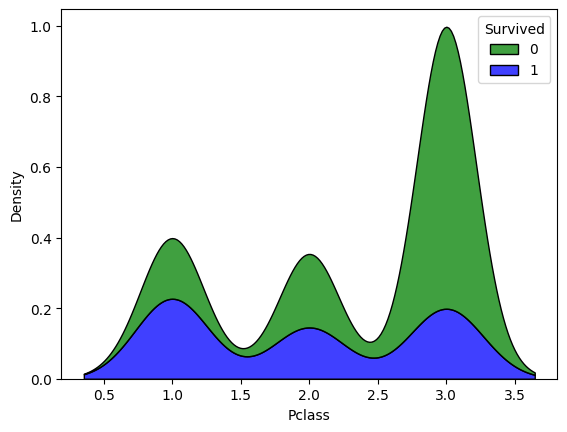

In [ ]:
#to know the survival rate among the passenger class
sns.kdeplot(data=df, x="Pclass", hue="Survived", multiple="stack",palette={0: 'green', 1: 'blue'})

C:\Users\Dharshinee R\AppData\Local\Temp\ipykernel_6628\3353330102.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df.groupby(['Pclass', 'AgeGroup'])


<Axes: xlabel='AgeGroup', ylabel='Pclass'>

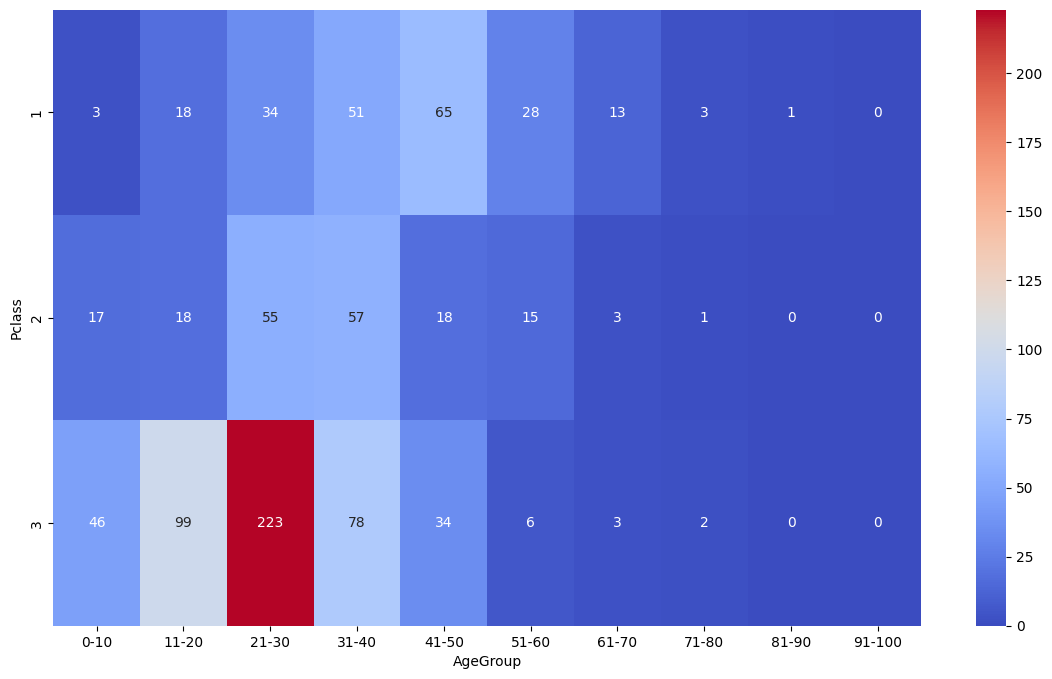

In [75]:
#to know the class preferred by the passengers across various age group
group = df.groupby(['Pclass', 'AgeGroup']) 
pclass_survived = group.size().unstack() 
plt.figure(figsize=(14, 8))
# Heatmap - Color encoded 2D representation of data. 
sns.heatmap(pclass_survived, annot = True, fmt ="g",cmap='coolwarm') 

In [77]:
age_fare_corr=df['Age'].corr(df['Fare'])
print("\n Correlation between Age and Fare:",age_fare_corr )



 Correlation between Age and Fare: 0.12118757296440655


In [78]:
min_age=df['Age'].min()
max_age=df['Age'].max()
mean_age=df['Age'].mean()
print("\n Min Age:", min_age)
print("\n Max Age:", max_age)
print("\n Mean Age:", mean_age)


 Min Age: 0.42

 Max Age: 80.0

 Mean Age: 29.1382379349046


C:\Users\Dharshinee R\AppData\Local\Temp\ipykernel_7832\1347222842.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_fare = df.groupby('AgeGroup')['Fare'].mean()


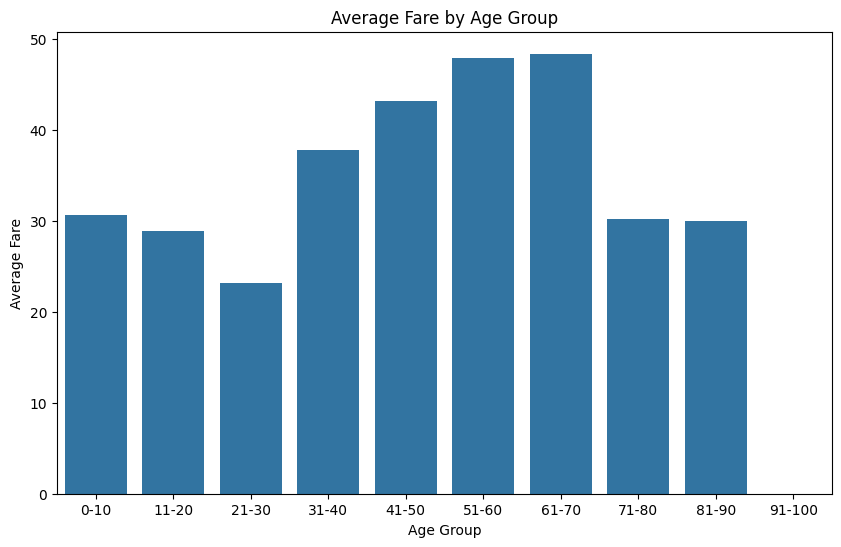

In [23]:
agegroup_fare = df.groupby('AgeGroup')['Fare'].mean()
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x=agegroup_fare.index, y=agegroup_fare.values)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Average Fare')
plt.title('Average Fare by Age Group')

# Show the plot
plt.show()

<Axes: title={'center': 'Survived by family size (%)'}, xlabel='FamilySize'>

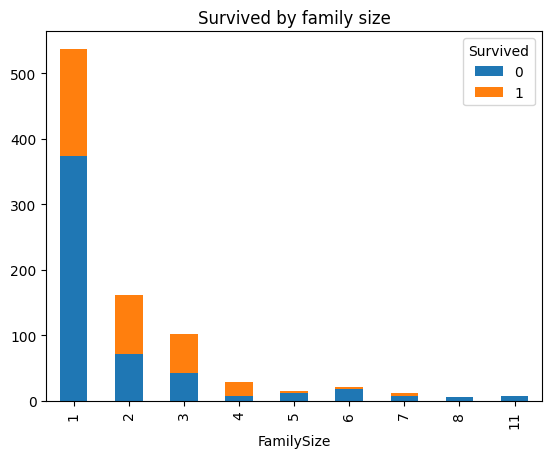

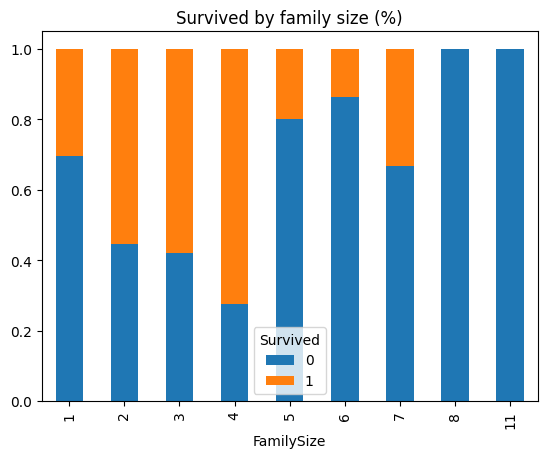

In [82]:
pd.crosstab(df['FamilySize'], df['Survived']).plot(kind='bar', stacked=True, title="Survived by family size")
pd.crosstab(df['FamilySize'], df['Survived'], normalize='index').plot(kind='bar', stacked=True, title="Survived by family size (%)")

<Axes: title={'center': 'Survived by family size (%)'}, xlabel='Alone'>

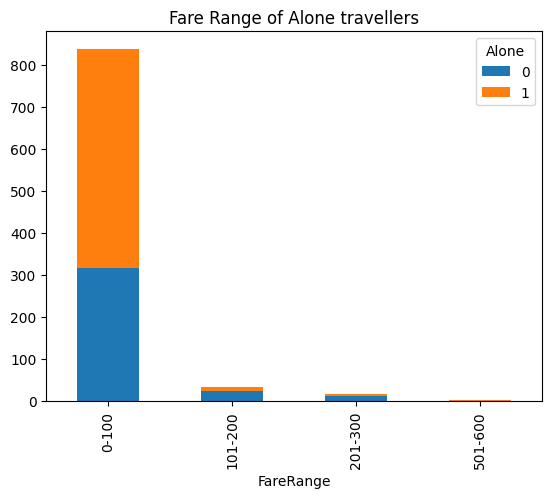

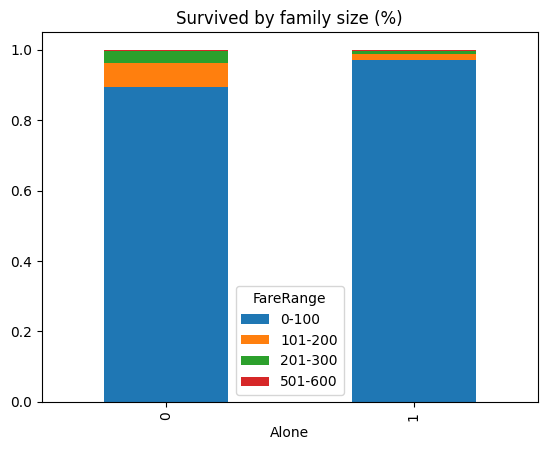

In [ ]:
#fare range of passengers travelling alone
pd.crosstab(df['FareRange'],df['Alone']).plot(kind='bar', stacked=True, title="Fare Range of Alone travellers")


In [117]:
pd.crosstab(df['Survived'],df['alone'])

alone,0,1
Survived,,
0,175,374
1,179,163


c:\Users\Dharshinee R\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


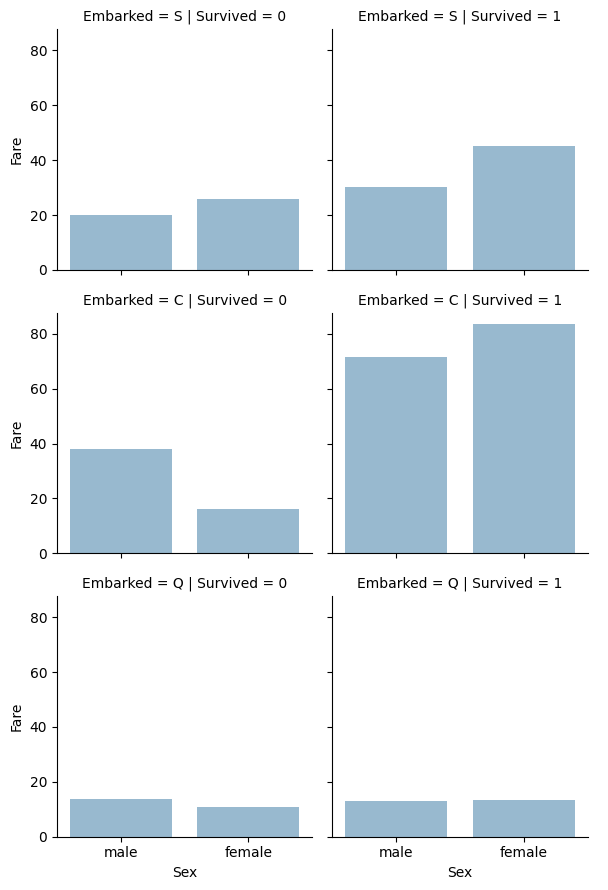

In [120]:
#to show the survival rate among the port and gender
grid = sns.FacetGrid(df, row = 'Embarked', col = 'Survived')
grid.map(sns.barplot, 'Sex', 'Fare', alpha = 0.5, errorbar=None)
grid.add_legend()

<Axes: title={'center': 'Male'}, xlabel='FamilySize'>

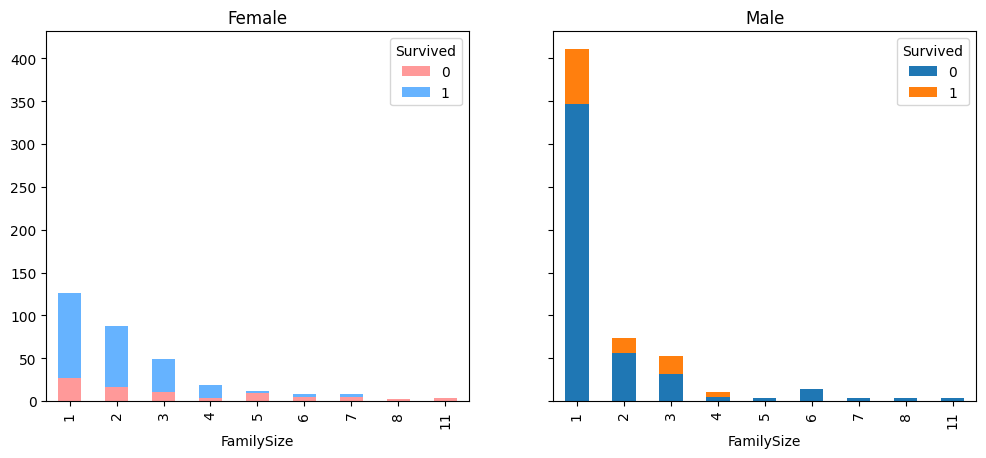

In [84]:
#Family size of Male and Female travellers along with their survival rate
female = df[df['Sex'] == 'female']
male = df[df['Sex'] == 'male']
colors = ['#ff9999', '#66b3ff']
# Total number
fig, [ax1, ax2] = plt.subplots(1,2, sharey=True)
fig.set_figwidth(12)
pd.crosstab(female['FamilySize'], female['Survived']).plot(kind='bar', stacked=True, title="Female", ax=ax1,color=colors)
pd.crosstab(male['FamilySize'], male['Survived']).plot(kind='bar', stacked=True, title="Male", ax=ax2)

<Axes: xlabel='Survived', ylabel='Pclass'>

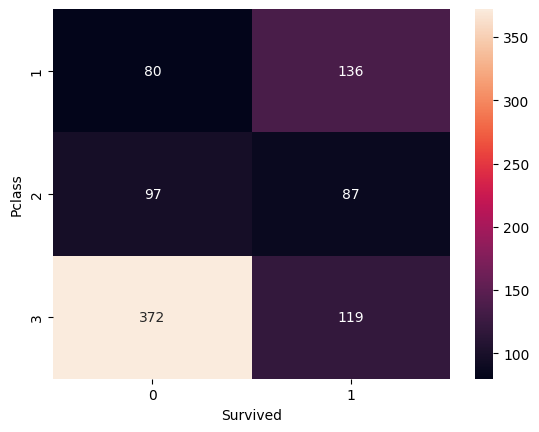

In [48]:
#To show the survival count among the class
group = df.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack() 
  
# Heatmap - Color encoded 2D representation of data. 
sns.heatmap(pclass_survived, annot = True, fmt ="d") 

<Axes: xlabel='alone', ylabel='Pclass'>

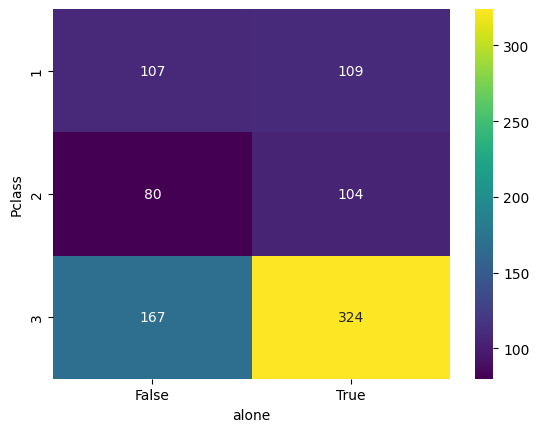

In [99]:
group = df.groupby(['Pclass', 'alone']) 
pclass_survived = group.size().unstack() 
  
# Heatmap - Color encoded 2D representation of data. 
sns.heatmap(pclass_survived, annot = True, fmt ="d",cmap='viridis') 

In [81]:
#to display the survival count among the titles
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.156673
3,Mrs,0.795276
4,Officer,0.277778
5,Royalty,0.600000


<Figure size 2000x1000 with 0 Axes>

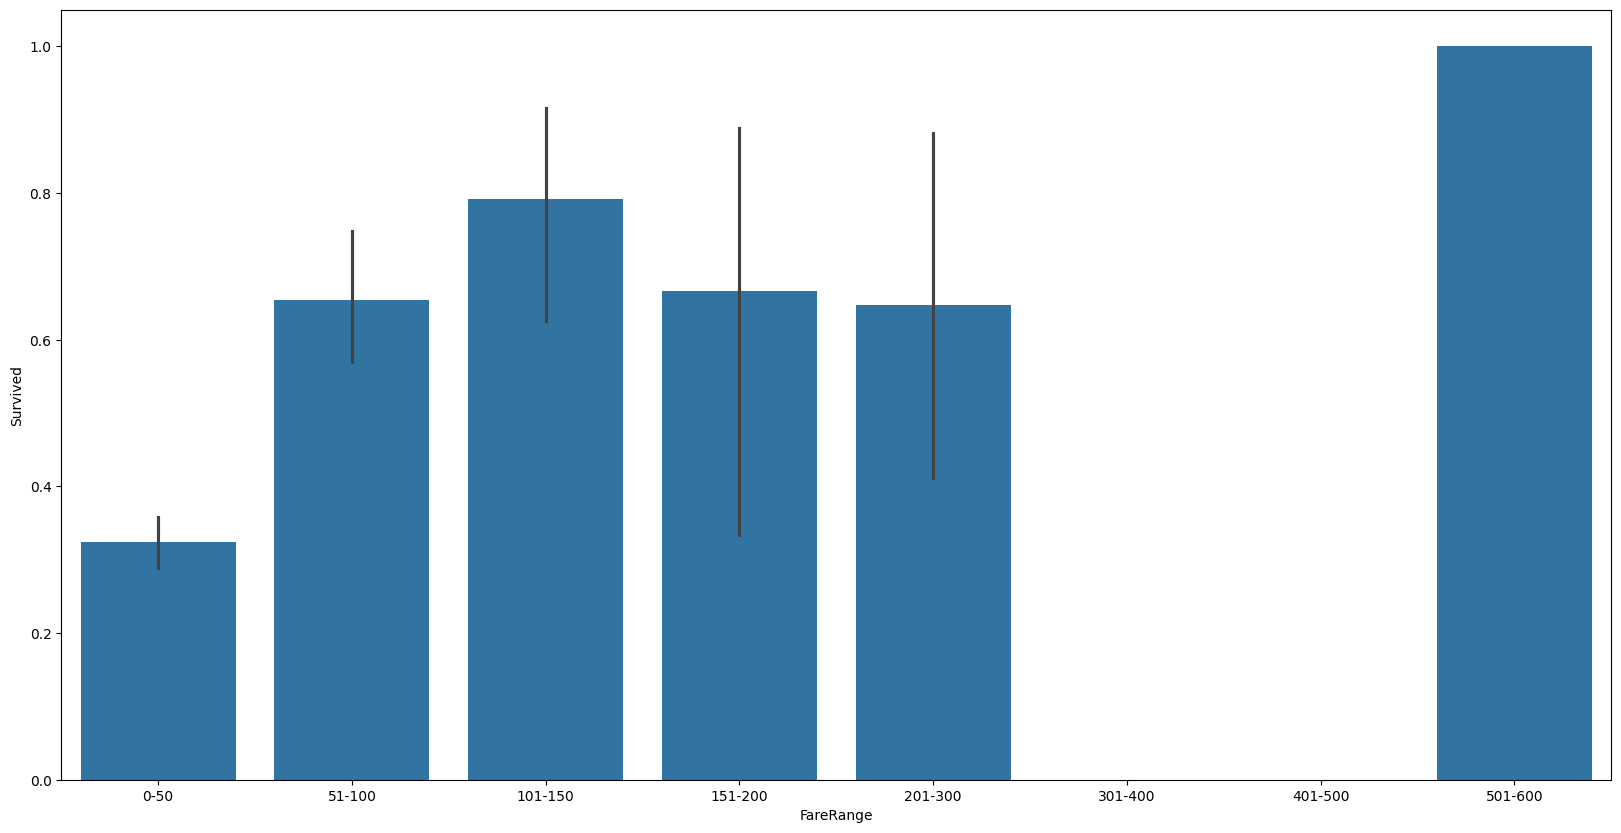

<Figure size 2000x1000 with 0 Axes>

In [88]:
plt.figure(figsize=(20, 10))
sns.barplot(x ='FareRange', y ='Survived',  
data = df) 
plt.figure(figsize=(20, 10))

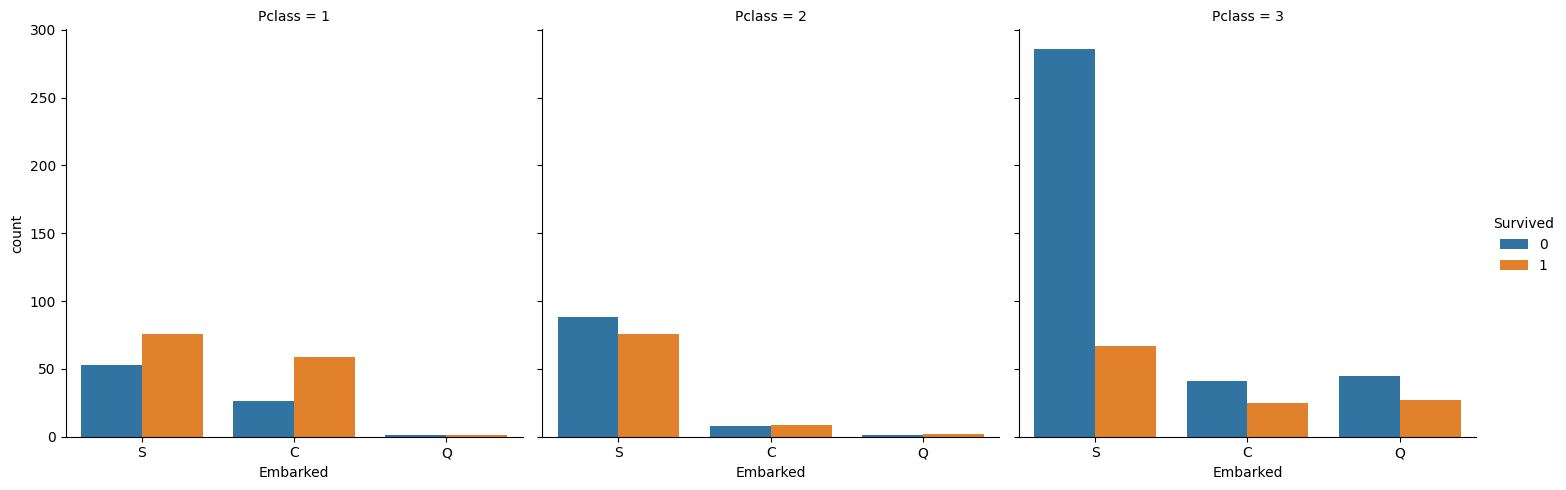

In [64]:
#to show the count of survival amoung various classes and ports
sns.catplot(x ='Embarked', hue ='Survived',  
kind ='count', col ='Pclass', data = df) 

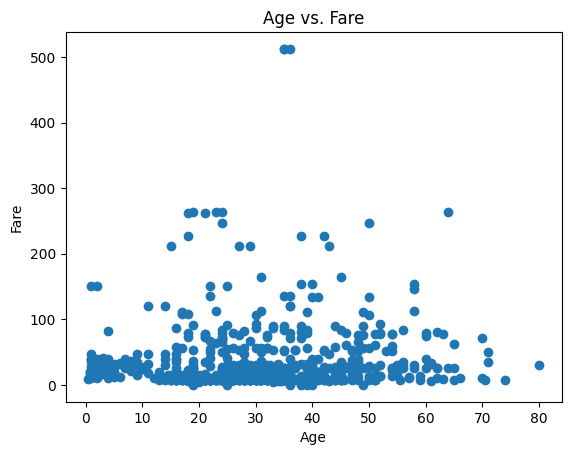

In [7]:
#scatter plot to display the relationship between age and fare
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.show()

In [5]:
correlation = df[['Age', 'Fare']].corr()
print(correlation)

           Age      Fare
Age   1.000000  0.096067
Fare  0.096067  1.000000


In [6]:
cross_tab = pd.crosstab(df['Pclass'], df['Survived'])
print(cross_tab)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
